In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import random
from random import shuffle
from IPython.display import Image, display
from tqdm import tqdm
from tensorflow.python import keras

In [2]:
DIR = 'C:/Users/Leo/Desktop/Cambridge/Probably_right_notes/Computer_Vision/mini-project/tiny-imagenet-200/tiny-imagenet-200'
file = os.listdir(DIR)
print(file)

img_rows, img_cols = 64,64
num_classes = 200

['test', 'train', 'val', 'wnids.txt', 'words.txt']


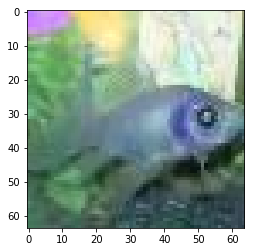

In [4]:
# flip the photo
path = 'C:/Users/Leo/Desktop/Cambridge/Probably_right_notes/Computer_Vision/mini-project/tiny-imagenet-200/tiny-imagenet-200/train/n01443537/images/n01443537_0.jpeg'
x = cv2.imread(path, cv2.IMREAD_COLOR)
plt.imshow(x)

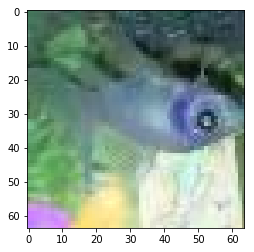

In [5]:
xflip = np.flipud(x)
plt.imshow(xflip)

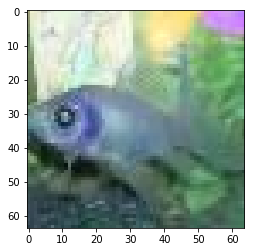

In [6]:
xflip2 = np.fliplr(x)
plt.imshow(xflip2)

In [3]:
# Extract data from the train file
# layers of files --> images
train_y = [] # label
train_x = [] # store 
y = []
out = []
path_train = os.path.join(DIR, 'train')

for file in tqdm(os.listdir(path_train)):
    out.append(file)
    path_class = os.path.join(path_train,file)
    path_class = os.path.join(path_class, 'images')
    for img in os.listdir(path_class):
        path_img = os.path.join(path_class, img)    
        
        y.append(out.index(file))
        x = cv2.imread(path_img, cv2.IMREAD_COLOR)           
        x = cv2.resize(x, (img_rows, img_cols))
        train_x.append(np.array(x))
        

train_x = train_x/np.amax(train_x)
train_y = keras.utils.to_categorical(np.array(y),num_classes)
s = np.arange(len(train_y))
shuffle(s)
train_y = train_y[s]
train_x = train_x[s]

train_x = train_x.reshape(-1,img_rows,img_cols,3)   
    
print(train_x.shape, train_y.shape)

train_x1 = train_x
train_y1 = train_y

#memory error? 
#--> just rerun and terminate the command window

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [06:36<00:00,  1.98s/it]


(100000, 64, 64, 3) (100000, 200)


In [4]:
# Extract data from the train file
# layers of files --> images
train_y = [] # label
train_x = [] # store 
y = []
out = []
path_train = os.path.join(DIR, 'train')

for file in tqdm(os.listdir(path_train)):
    out.append(file)
    path_class = os.path.join(path_train,file)
    path_class = os.path.join(path_class, 'images')
    for img in os.listdir(path_class):
        path_img = os.path.join(path_class, img)    
        y.append(out.index(file))      
        x = cv2.imread(path_img, cv2.IMREAD_COLOR)
        xflip = np.fliplr(x)
        xflip = cv2.resize(xflip, (img_rows, img_cols))
        train_x.append(np.array(xflip))


train_x = train_x/np.amax(train_x)
train_y = keras.utils.to_categorical(np.array(y),num_classes)
s = np.arange(len(train_y))
shuffle(s)
train_y = train_y[s]
train_x = train_x[s]

train_x = train_x.reshape(-1,img_rows,img_cols,3)   
    
print(train_x.shape, train_y.shape)

train_x2 = train_x
train_y2 = train_y

#memory error? 
#--> just rerun and terminate the command window

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [04:49<00:00,  1.45s/it]


(100000, 64, 64, 3) (100000, 200)


In [5]:
# Extract data from the train file
# layers of files --> images
train_y = [] # label
train_x = [] # store 
y = []
out = []
path_train = os.path.join(DIR, 'train')

for file in tqdm(os.listdir(path_train)):
    out.append(file)
    path_class = os.path.join(path_train,file)
    path_class = os.path.join(path_class, 'images')
    for img in os.listdir(path_class):
        path_img = os.path.join(path_class, img)    
        y.append(out.index(file))
        x = cv2.imread(path_img, cv2.IMREAD_COLOR)
        xflip2 = np.flipud(x)
        xflip2 = cv2.resize(xflip2, (img_rows, img_cols))
        train_x.append(np.array(xflip2))       

train_x = train_x/np.amax(train_x)
train_y = keras.utils.to_categorical(np.array(y),num_classes)
s = np.arange(len(train_y))
shuffle(s)
train_y = train_y[s]
train_x = train_x[s]

train_x = train_x.reshape(-1,img_rows,img_cols,3)   
    
print(train_x.shape, train_y.shape)

train_x3 = train_x
train_y3 = train_y

#memory error? 
#--> just rerun and terminate the command window

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [04:51<00:00,  1.46s/it]


(100000, 64, 64, 3) (100000, 200)


In [8]:
type(train_x1)

numpy.ndarray

In [10]:
train_x = []
train_y = []
train_x = np.concatenate((train_x1,train_x2))
train_y = np.concatenate((train_y1,train_y2))

print(train_x.shape, train_y.shape)

(200000, 64, 64, 3) (200000, 200)


In [16]:
print(train_x.size*train_x.itemsize/1024/1024/1024)

18.310546875


In [13]:
train_x = np.concatenate((train_x,train_x3[:10000]))
train_y = np.concatenate((train_y,train_y3[:10000]))

print(train_x.shape, train_y.shape)

MemoryError: 

In [17]:
# save file
np.save('train_x12.npy',train_x)
np.save('train_y12.npy',train_y)
np.save('train_x3.npy',train_x3)
np.save('train_y3.npy',train_y3)